Connected to remote API server
Getting first image
Image not detected
image 0 captured

image 1 captured

image 2 captured

image 3 captured

image 4 captured

image 5 captured

image 6 captured

image 7 captured

image 8 captured

image 9 captured

Program ended


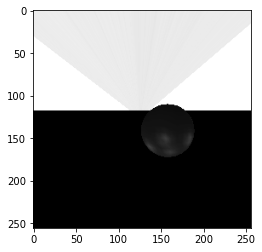

In [1]:
import sim as s
import time as t
import cv2
import numpy as np
import math as m
import matplotlib.pyplot as plt


s.simxFinish(-1)

clientID = s.simxStart('127.0.0.1', 19999, True, True, 5000, 5)

if clientID!=-1:
    
    print("Connected to remote API server")
    res, v1 = s.simxGetObjectHandle(clientID, 'Vision_sensor', s.simx_opmode_oneshot_wait)
    print('Getting first image')
    err, resolution, image = s.simxGetVisionSensorImage(clientID, v1, 0, s.simx_opmode_streaming)
    
    x=0
    n=10
    while x < n:
        err, resolution, image = s.simxGetVisionSensorImage(clientID, v1, 0, s.simx_opmode_buffer)
        if err == s.simx_return_ok:
            print("image", x, "captured\n")
            img = np.array(image, dtype = np.uint8)
            img.resize([resolution[1], resolution[0], 3])
            x+=1
        elif err == s.simx_return_novalue_flag:
            print("Image not detected")
            pass
        else:
            print("Did not capture picture, error:", err)
        t.sleep(1)
    
    s.simxFinish(clientID)
                  
else:
    print("Failed to connect to remote API server")
print("Program ended")
plt.imshow(img)
image_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(image_gray, cmap='gray')

In [2]:
def cameraOr(position, alpha):
    cam_Or = []
    cam_Or.append((m.cos(alpha)*position[0])+(-m.sin(alpha)*position[0]))
    cam_Or.append((m.sin(alpha)*position[1])+(m.cos(alpha)*position[1]))
    cam_Or.append(position[2])
    
    return cam_Or

[[[157.5 140.5  31. ]]]
Camera orietation for picture  0 : 
 [-0.32860827908583, -0.6464769010905989, 0.4069]


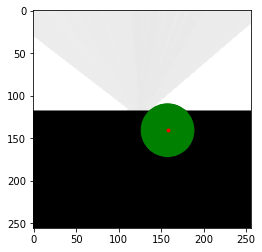

In [3]:
image_gray = cv2.medianBlur(image_gray,5)
circles = cv2.HoughCircles(image_gray, cv2.HOUGH_GRADIENT, 1, image_gray.shape[0]/8, param1 =30, param2 = 15, minRadius = 10, maxRadius = 0)
cam_pos = []
alpha = []
Umax = resolution[0]
Uo = Umax/2

plt.imshow(image_gray, cmap='gray')
    
print(circles)

fig = plt.gcf()
ax = fig.gca()

    
if circles is not None:
    for circle in circles[0, :]:
        center  = (circle[0], circle[1]) #center in pixels
        radius = circle[2] #radius in pixels
        K = radius/0.75 #meter to pixel conversion
        Xmax = (Umax-Uo)/K
        Xc = ((center[0]-Uo)/K)
        Yc = (Xmax/m.tan(30))
        cam_pos.append((Xc, Yc,0.4069))
        alpha.append(s.simxGetObjectOrientation(clientID, v1, -1, s.simx_opmode_buffer))
        circ_plt = plt.Circle((center[0],center[1]), radius, color = 'g')
        ax.add_artist(circ_plt)
        plt.plot(center[0], center[1], '.', color = 'r')

    for i in range(len(cam_pos)):
        print("Camera orietation for picture ",i,": \n",cameraOr(cam_pos[i], m.radians(alpha[i][0])))
                 
else:
    print("No circles to plot")

X-values:  -10  Y-values:  -10
X-values:  -10  Y-values:  -9
X-values:  -10  Y-values:  -8
X-values:  -10  Y-values:  -7
X-values:  -10  Y-values:  -6
X-values:  -10  Y-values:  -5
X-values:  -10  Y-values:  -4
X-values:  -10  Y-values:  -3
X-values:  -10  Y-values:  -2
X-values:  -10  Y-values:  -1
X-values:  -10  Y-values:  0
X-values:  -10  Y-values:  1
X-values:  -10  Y-values:  2
X-values:  -10  Y-values:  3
X-values:  -10  Y-values:  4
X-values:  -10  Y-values:  5
X-values:  -10  Y-values:  6
X-values:  -10  Y-values:  7
X-values:  -10  Y-values:  8
X-values:  -10  Y-values:  9
X-values:  -9  Y-values:  -10
X-values:  -9  Y-values:  -9
X-values:  -9  Y-values:  -8
X-values:  -9  Y-values:  -7
X-values:  -9  Y-values:  -6
X-values:  -9  Y-values:  -5
X-values:  -9  Y-values:  -4
X-values:  -9  Y-values:  -3
X-values:  -9  Y-values:  -2
X-values:  -9  Y-values:  -1
X-values:  -9  Y-values:  0
X-values:  -9  Y-values:  1
X-values:  -9  Y-values:  2
X-values:  -9  Y-values:  3
X-valu

X-values:  5  Y-values:  -6
X-values:  5  Y-values:  -5
X-values:  5  Y-values:  -4
X-values:  5  Y-values:  -3
X-values:  5  Y-values:  -2
X-values:  5  Y-values:  -1
X-values:  5  Y-values:  0
X-values:  5  Y-values:  1
X-values:  5  Y-values:  2
X-values:  5  Y-values:  3
X-values:  5  Y-values:  4
X-values:  5  Y-values:  5
X-values:  5  Y-values:  6
X-values:  5  Y-values:  7
X-values:  5  Y-values:  8
X-values:  5  Y-values:  9
X-values:  6  Y-values:  -10
X-values:  6  Y-values:  -9
X-values:  6  Y-values:  -8
X-values:  6  Y-values:  -7
X-values:  6  Y-values:  -6
X-values:  6  Y-values:  -5
X-values:  6  Y-values:  -4
X-values:  6  Y-values:  -3
X-values:  6  Y-values:  -2
X-values:  6  Y-values:  -1
X-values:  6  Y-values:  0
X-values:  6  Y-values:  1
X-values:  6  Y-values:  2
X-values:  6  Y-values:  3
X-values:  6  Y-values:  4
X-values:  6  Y-values:  5
X-values:  6  Y-values:  6
X-values:  6  Y-values:  7
X-values:  6  Y-values:  8
X-values:  6  Y-values:  9
X-values:  

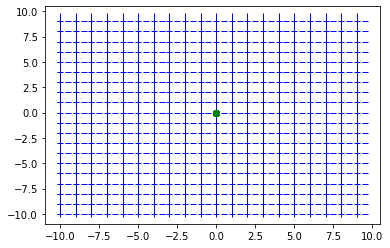

In [4]:
X_lim = 20
Y_lim = 20

platform = np.ones(X_lim*Y_lim)
X_axis, Y_axis = np.mgrid[-10:11:1,-10:11:1]
dist_Arr = []

for i in range(X_lim):
    for j in range(Y_lim):
        plt.plot(X_axis[i][j], Y_axis[i][j], '|', color='b')
        plt.plot(X_axis[i][j], Y_axis[i][j], '_', color='b')
        plt.plot(X_axis[i][j]+0.5, Y_axis[i][j], '_', color='b')
        plt.plot(X_axis[i][j], Y_axis[i][j]+0.5, '|', color='b')
        plt.plot(0,0, 'o', color = 'g')
        dist_Arr.append(m.sqrt(((cam_pos[0][1]-X_axis[i][j])**2)+((cam_pos[0][1]-Y_axis[i][j])**2)))
        #print("X-values: ", X_axis[i][j], " Y-values: ", Y_axis[i][j])
print(len(dist_Arr))

In [5]:
l0 = 0.6/(1-0.6)
Lt = 0
X_axis = X_axis.flatten()
Y_axis = Y_axis.flatten()
for i in range(len(platform)):
    if(dist_Arr[i]<(radius/(radius/0.75))):
        p0 = 0.9
        Lt = m.log(p0/(1-p0))-m.log(l0)+platform[i]
        platform[i] = Lt
        print(platform[i])
    else: 
        p0 = l0*(1-0.6)
        angle = np.arctan2(Y_axis[i], X_axis[i])
        if np.logical_and(-m.pi/3 < angle, angle < -m.pi/3):
            Lt = m.log(p0/(1-p0))-m.log(l0)+platform[i]
            platform[i] = Lt
        pass
    
        

2.7917594692280554
2.7917594692280554
2.7917594692280554
2.7917594692280554


TypeError: unsupported operand type(s) for -: 'int' and 'tuple'

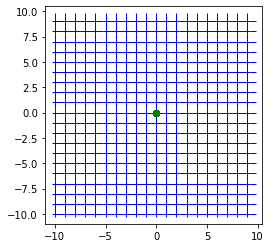

In [12]:
fig2 = plt.figure()
ax = fig2.add_subplot(1,1,1,aspect = 'equal')
Newx_axis, Newy_axis = np.mgrid[-10:11:1,-10:11:1]

norm_platform = platform/np.linalg.norm(platform)

for i in range(X_lim):
    for j in range(Y_lim):
        plt.plot(Newx_axis[i][j], Newy_axis[i][j], '|', color='b')
        plt.plot(Newx_axis[i][j], Newy_axis[i][j], '_', color='b')
        plt.plot(Newx_axis[i][j]+0.5, Newy_axis[i][j], '_', color='b')
        plt.plot(Newx_axis[i][j], Newy_axis[i][j]+0.5, '|', color='b')
        plt.plot(0,0, 'o', color = 'g')

for c in zip(norm_platform):
    pos = plt.Polygon((X_axis, Y_axis), color = '%f'%(1-c))
    ax.add_patch(pos)
    